**Q-learning on the GridWorld Environment**  
Instructions: Run the notebook, run experiments using different hyperparameters

In [1]:
import numpy as np
import random
import seaborn as sns
import timeit, functools
import matplotlib.pyplot as plt

In [2]:
from quarry import *
from Task2_and_4_utils import *

In [29]:
#create environment, define hyperparams (NB many different experiment results are shown in the report - this is just the 'dashboard')
env = Quarry(30)
epsilon = 1  
decay = 0.01
alpha = 0.1
gamma = 0.96

In [30]:
#create policy
qpolicy=QPolicy(env, epsilon, decay, alpha, gamma)

In [31]:
#run experiment
r_totals=[]
for i in range(3000):
    r_totals.append(run_qlearn_episode(env, qpolicy))
    qpolicy.update_epsilon() # update epsilon after each episode

<IPython.core.display.Javascript object>

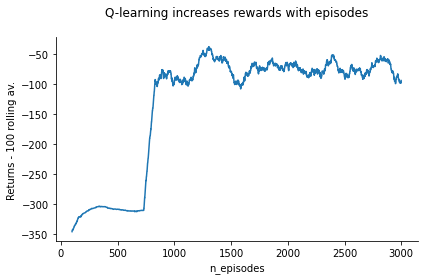

In [32]:
#plot 100 rolling average of returns
score_series=pd.Series(r_totals)
plt.rcParams['axes.spines.right'] = False # remove the top and right spines because it look better without
plt.rcParams['axes.spines.top'] = False
score_series.rolling(100).mean().plot()
plt.title('Q-learning increases rewards with episodes\n')
plt.xlabel('n_episodes')
plt.ylabel('Returns - 100 rolling av.')
plt.tight_layout()

In [24]:
#time how long it takes
t = timeit.Timer(functools.partial(run_qlearn_episode, env, qpolicy)) 
algo_name = run_qlearn_episode.__name__
print(algo_name,'takes', t.timeit(1000), 'seconds to run 1000 times on the given env')

run_qlearn_episode takes 2.2000528000003214 seconds to run 1000 times on the given env


**Run the notebook with alternative parameters to conduct further experiments**